In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (8, 5)

In [2]:
s = ct.tf('s')

#Dinâmica do sistema:
G = (1.2/((s+1)**3))

#Controlador:
C = (((1.1*(s**2)) + (2.05*s) + 1)/((0.1*(s**2)) + (2*s)))

#Dinâmica de realimentação:
H = (1/(s+0.5))

In [3]:
#Malha fechada:
sys = ct.feedback((G*C), H, -1)

sys

TransferFunction(array([1.32, 3.12, 2.43, 0.6 ]), array([0.1 , 2.35, 7.45, 9.25, 6.37, 3.46, 1.2 ]))

In [4]:
ct.poles(sys)

array([-19.99820512+0.j        ,  -0.02928458+0.64741434j,
        -0.02928458-0.64741434j,  -0.9326332 +0.18867621j,
        -0.9326332 -0.18867621j,  -1.57795932+0.j        ])

In [5]:
ct.zeros(sys)

array([-0.93181818+0.20200442j, -0.93181818-0.20200442j,
       -0.5       +0.j        ])

(array([[-1.99982051e+01+0.00000000e+00j, -1.57795932e+00+0.00000000e+00j,
         -9.32633203e-01-1.88676212e-01j, -9.32633203e-01+1.88676212e-01j,
         -2.92845787e-02-6.47414339e-01j, -2.92845787e-02+6.47414339e-01j],
        [-2.00556902e+01+0.00000000e+00j, -1.09763053e+00+0.00000000e+00j,
         -9.50648542e-01-1.79612453e-01j, -9.50648542e-01+1.79612453e-01j,
         -2.22691112e-01-1.00688313e+00j, -2.22691112e-01+1.00688313e+00j],
        [-2.00556902e+01+0.00000000e+00j, -1.09763053e+00+0.00000000e+00j,
         -9.50648542e-01-1.79612453e-01j, -9.50648542e-01+1.79612453e-01j,
         -2.22691112e-01-1.00688313e+00j, -2.22691112e-01+1.00688313e+00j],
        [-2.00649103e+01+0.00000000e+00j, -1.02113117e+00+0.00000000e+00j,
         -9.58401935e-01-1.83721358e-01j, -9.58401935e-01+1.83721358e-01j,
         -2.48577351e-01-1.06922294e+00j, -2.48577351e-01+1.06922294e+00j],
        [-2.00649103e+01+0.00000000e+00j, -1.02113117e+00+0.00000000e+00j,
         -9.58401935e

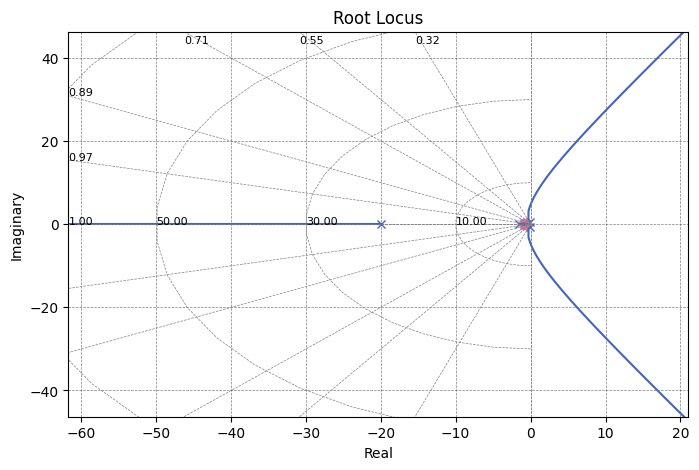

In [6]:
ct.root_locus(sys)

(array([1.96116135, 1.96081212, 1.96045985, 1.96010451, 1.95974607,
        1.95938451, 1.95901981, 1.95865193, 1.95828086, 1.95790656,
        1.95752901, 1.95714819, 1.95676407, 1.95637662, 1.95598581,
        1.95559162, 1.95519402, 1.95479298, 1.95438848, 1.95398049,
        1.95356898, 1.95315392, 1.95273528, 1.95231304, 1.95188716,
        1.95145763, 1.9510244 , 1.95058745, 1.95014675, 1.94970227,
        1.94925399, 1.94880186, 1.94834587, 1.94788598, 1.94742216,
        1.94695437, 1.9464826 , 1.94600681, 1.94552696, 1.94504302,
        1.94455497, 1.94406278, 1.9435664 , 1.94306581, 1.94256097,
        1.94205186, 1.94153844, 1.94102068, 1.94049854, 1.93997199,
        1.93944099, 1.93890553, 1.93836555, 1.93782103, 1.93727192,
        1.93671821, 1.93615985, 1.9355968 , 1.93502904, 1.93445653,
        1.93387923, 1.9332971 , 1.93271012, 1.93211824, 1.93152143,
        1.93091966, 1.93031288, 1.92970105, 1.92908416, 1.92846214,
        1.92783498, 1.92720262, 1.92656504, 1.92

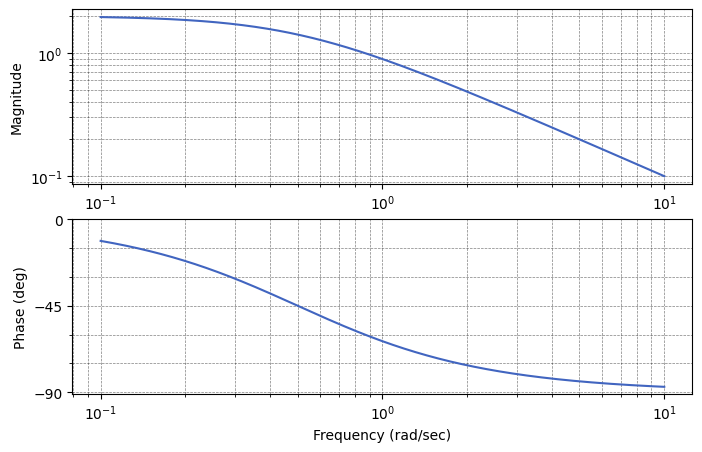

In [7]:
ct.bode(H)

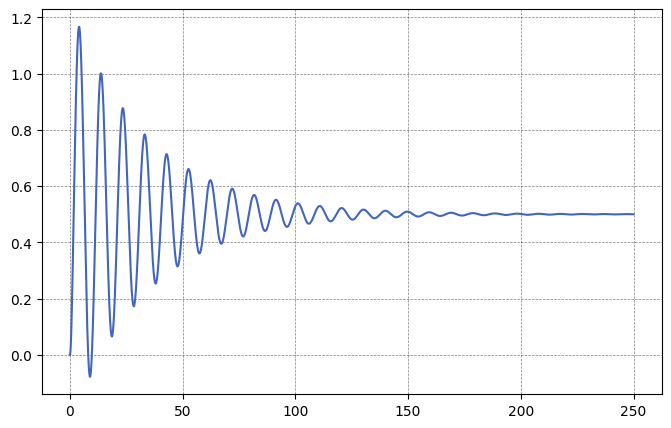

In [8]:
t = np.arange(0, 250, 1e-2)

t, y = ct.step_response(sys, t)

plt.figure(1)
plt.plot(t, y)
plt.show()